# Project - Employees Dataset

## Table of Content
<ul>
    <li><a href='#Introduction'>Introduction</a></li>
    <li><a href='#Wrangling'>Data Wrangling</a></li>
    <li><a href='#Exploratory'>Exploratory Data Analysis</a></li>
    <li><a href='#visualization'>Data visualization</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Introduction'></a>
# Introduction
The company specializes in software development and has a diverse workforce across different departments, including engineering, marketing, sales, and customer support.<br>
1.	Understand the factors influencing employee attrition and job satisfaction.<br>
2.	Develop strategies to improve employee engagement and retention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

<a id='Wrangling'><a/> 
# Data Wrangling

In [2]:
df = pd.read_csv('Data-Employee.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.shape

(1470, 35)

In [6]:
df.duplicated().sum()

0

In [46]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<a id='Exploratory'></a>
# Exploratory Data Analysis

In [7]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [8]:
df.groupby(['Attrition']).get_group('Yes')['Gender'].value_counts()

Male      150
Female     87
Name: Gender, dtype: int64

In [9]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
755,45,No,Travel_Rarely,1234,Sales,11,2,Life Sciences,1,1045,4,Female,90,3,4,Manager,4,Married,17650,5404,3,Y,No,13,3,2,80,1,26,4,4,9,3,1,1
377,36,No,Travel_Rarely,329,Research & Development,2,3,Life Sciences,1,501,4,Female,96,3,1,Research Scientist,3,Married,2543,11868,4,Y,No,13,3,2,80,1,6,3,3,2,2,2,2
830,41,No,Travel_Rarely,167,Research & Development,12,4,Life Sciences,1,1158,2,Male,46,3,1,Laboratory Technician,4,Married,4766,9051,3,Y,Yes,11,3,1,80,1,6,4,3,1,0,0,0
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8
732,30,Yes,Travel_Frequently,109,Research & Development,5,3,Medical,1,1017,2,Female,60,3,1,Laboratory Technician,2,Single,2422,25725,0,Y,No,17,3,1,80,0,4,3,3,3,2,1,2
328,33,No,Travel_Frequently,508,Sales,10,3,Marketing,1,446,2,Male,46,2,2,Sales Executive,4,Single,4682,4317,3,Y,No,14,3,3,80,0,9,6,2,7,7,0,1
653,50,No,Non-Travel,881,Research & Development,2,4,Life Sciences,1,905,1,Male,98,3,4,Manager,1,Divorced,17924,4544,1,Y,No,11,3,4,80,1,31,3,3,31,6,14,7
1083,40,Yes,Travel_Rarely,676,Research & Development,9,4,Life Sciences,1,1534,4,Male,86,3,1,Laboratory Technician,1,Single,2018,21831,3,Y,No,14,3,2,80,0,15,3,1,5,4,1,0
956,56,No,Travel_Rarely,206,Human Resources,8,4,Life Sciences,1,1338,4,Male,99,3,5,Manager,2,Single,19717,4022,6,Y,No,14,3,1,80,0,36,4,3,7,3,7,7
1305,54,No,Travel_Rarely,431,Research & Development,7,4,Medical,1,1830,4,Female,68,3,2,Research Scientist,4,Married,6854,15696,4,Y,No,15,3,2,80,1,14,2,2,7,1,1,7


In [10]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [11]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [12]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [13]:
df.groupby(['Attrition']).get_group('Yes')['Department'].value_counts()

Research & Development    133
Sales                      92
Human Resources            12
Name: Department, dtype: int64

In [14]:
df.groupby(['Attrition']).get_group('Yes')['EducationField'].value_counts()

Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64

In [15]:
df.groupby(['Attrition']).get_group('Yes')['EnvironmentSatisfaction'].value_counts()

1    72
3    62
4    60
2    43
Name: EnvironmentSatisfaction, dtype: int64

In [16]:
df.groupby(['Attrition']).get_group('Yes')['JobSatisfaction'].value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

In [17]:
df.Age.value_counts().nlargest(15)

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
Name: Age, dtype: int64

In [18]:
df.groupby(['Attrition']).get_group('Yes')['Age'].value_counts().nlargest(10)

31    18
29    18
28    14
33    12
26    12
32    11
35    10
34     9
30     9
24     7
Name: Age, dtype: int64

In [19]:
df.query("Age == 28 and Attrition == 'Yes'")['MonthlyIncome'].mean()

3782.0

In [20]:
df.groupby(['Attrition']).get_group('No')['Age'].value_counts().nlargest(5)

34    68
35    68
36    63
38    56
40    52
Name: Age, dtype: int64

In [21]:
df.query(" Age == 35 and Attrition == 'No'")['MonthlyIncome'].mean()

5427.661764705882

In [22]:
df.MonthlyIncome.mean()

6502.931292517007

In [23]:
high = df.query('MonthlyIncome >= 6502.931292517007')['MonthlyIncome']
lower = df.query('MonthlyIncome < 6502.931292517007')['MonthlyIncome']

high.mean(), lower.mean()

(11916.953346855984, 3770.983623336745)

In [24]:
VHS = df.query('MonthlyIncome >= 11916.953346855984')['MonthlyIncome']
HS = df.query('MonthlyIncome >= 6502.931292517007 and MonthlyIncome < 11916.953346855984')['MonthlyIncome']
LS = df.query('MonthlyIncome < 6502.931292517007 and MonthlyIncome >= 3770.983623336745')['MonthlyIncome']
VLS = df.query('MonthlyIncome < 3770.983623336745')['MonthlyIncome']
VHS.mean(), HS.mean(), LS.mean(), VLS.mean()

(16512.331658291456, 8806.47619047619, 5035.249462365591, 2622.7734375)

In [25]:
salaryLevel = []

for x in df['MonthlyIncome']:
    if x >= 11916.953346855984:
        salaryLevel.append('VHS')
    elif x >= 6502.931292517007 and x < 11916.953346855984:
        salaryLevel.append('HS')
    elif x < 6502.931292517007 and x >= 3770.983623336745:
        salaryLevel.append('LS')
    else:
        salaryLevel.append('VLS')

df['SalaryLevel'] = salaryLevel

df.sample(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryLevel
870,35,No,Travel_Rarely,1361,Sales,17,4,Life Sciences,1,1218,3,Male,94,3,2,Sales Executive,1,Married,8966,21026,3,Y,Yes,15,3,4,80,3,15,2,3,7,7,1,7,HS
217,29,Yes,Travel_Rarely,992,Research & Development,1,3,Technical Degree,1,300,3,Male,85,3,1,Research Scientist,3,Single,2058,19757,0,Y,No,14,3,4,80,0,7,1,2,6,2,1,5,VLS
732,30,Yes,Travel_Frequently,109,Research & Development,5,3,Medical,1,1017,2,Female,60,3,1,Laboratory Technician,2,Single,2422,25725,0,Y,No,17,3,1,80,0,4,3,3,3,2,1,2,VLS
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,3,Male,80,3,2,Healthcare Representative,3,Married,5689,24594,1,Y,Yes,14,3,4,80,2,10,2,4,10,2,0,2,LS
264,28,Yes,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,Y,No,11,3,3,80,0,5,5,1,0,0,0,0,VLS
1111,53,Yes,Travel_Rarely,607,Research & Development,2,5,Technical Degree,1,1572,3,Female,78,2,3,Manufacturing Director,4,Married,10169,14618,0,Y,No,16,3,2,80,1,34,4,3,33,7,1,9,HS
458,40,No,Non-Travel,1094,Sales,28,3,Other,1,615,3,Male,58,1,3,Sales Executive,1,Divorced,10932,11373,3,Y,No,15,3,3,80,1,20,2,3,1,0,0,1,HS
1393,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,4,Male,44,3,2,Sales Executive,4,Single,4105,5099,1,Y,No,14,3,1,80,0,7,5,3,7,7,0,7,LS
913,45,Yes,Travel_Rarely,1449,Sales,2,3,Marketing,1,1277,1,Female,94,1,5,Manager,2,Single,18824,2493,2,Y,Yes,16,3,1,80,0,26,2,3,24,10,1,11,VHS
764,28,No,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,4,Male,74,3,1,Sales Representative,2,Married,1052,23384,1,Y,No,22,4,2,80,0,1,5,3,1,0,0,0,VLS


In [26]:
df.SalaryLevel.value_counts()

VLS    512
LS     465
HS     294
VHS    199
Name: SalaryLevel, dtype: int64

In [27]:
df.groupby(['Attrition']).get_group('Yes')['MaritalStatus'].value_counts()

Single      120
Married      84
Divorced     33
Name: MaritalStatus, dtype: int64

In [28]:
df.groupby(['Attrition']).get_group('Yes')['OverTime'].value_counts()

Yes    127
No     110
Name: OverTime, dtype: int64

In [29]:
df.TotalWorkingYears.value_counts().nlargest(20)

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
Name: TotalWorkingYears, dtype: int64

In [30]:
df.groupby(['Attrition']).get_group('Yes')['TotalWorkingYears'].value_counts().nlargest(10)

1     40
10    25
6     22
7     18
8     16
5     16
4     12
9     10
3      9
2      9
Name: TotalWorkingYears, dtype: int64

In [31]:
df.YearsAtCompany.value_counts().nlargest(10)

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
Name: YearsAtCompany, dtype: int64

In [32]:
df.groupby(['Attrition']).get_group('Yes')['YearsAtCompany'].value_counts().nlargest(10)

1     59
2     27
5     21
3     20
4     19
10    18
0     16
7     11
8      9
6      9
Name: YearsAtCompany, dtype: int64

<a id='visualization'></a>
# Data visualization

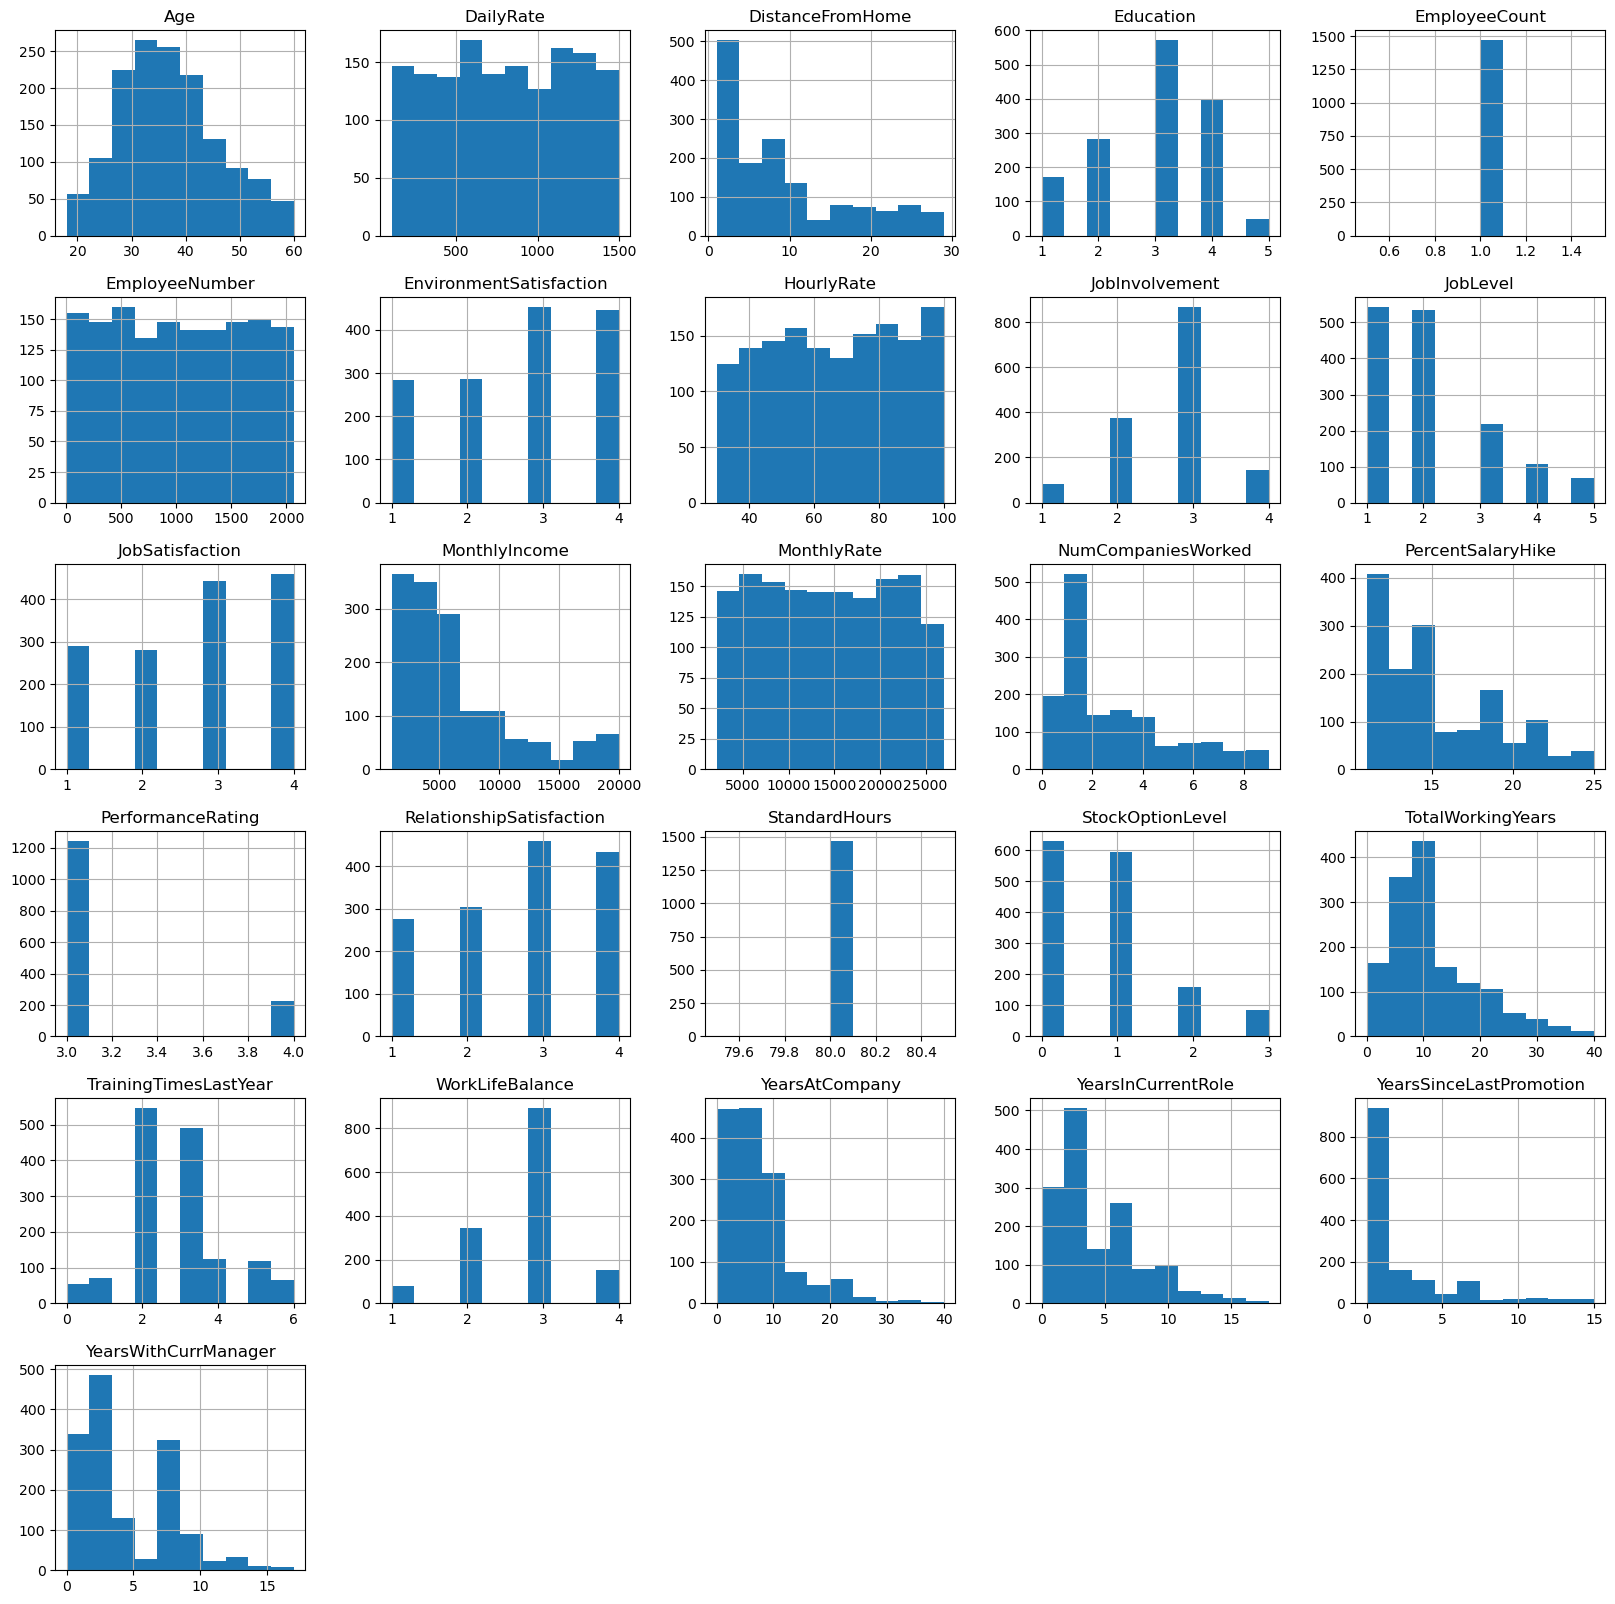

In [33]:
df.hist(figsize=(20,20));

C:\Users\nawaf\AppData\Local\Temp\ipykernel_20164\2434874642.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Age']);


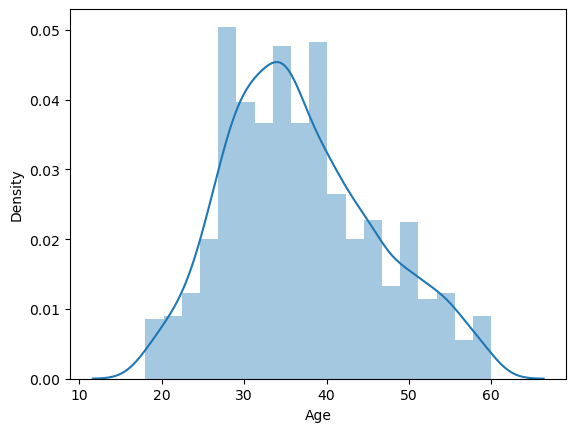

In [34]:
sb.distplot(df['Age']);

<Axes: >

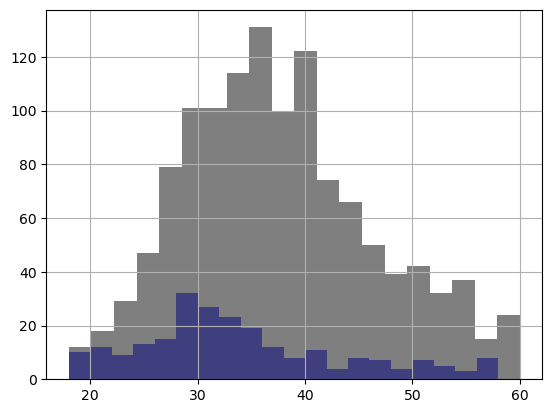

In [35]:
yes = df.Attrition == 'Yes'
no = df.Attrition == 'No'
df.Age[yes].hist(alpha=0.5, bins=20, color='blue', label='Yes')
df.Age[no].hist(alpha=0.5, bins=20, color='black', label='No')

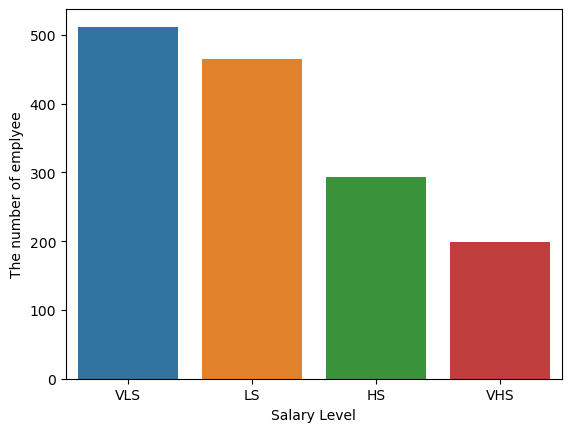

In [36]:
order = ['VLS','LS','HS','VHS']
sb.countplot(data=df, x='SalaryLevel', order=order);
plt.xlabel('Salary Level')
plt.ylabel('The number of emplyee');

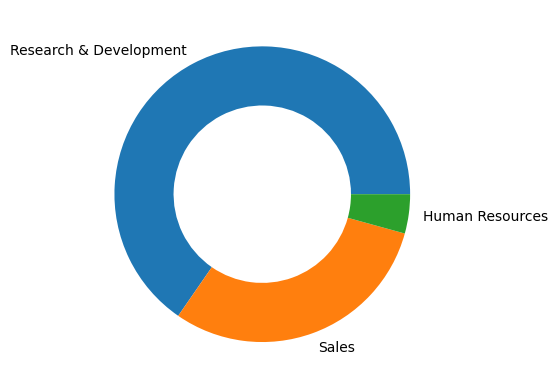

In [37]:
dep = df.Department.value_counts()
edu = df.EducationField.value_counts()
gen = df.Gender.value_counts()
job = df.JobRole.value_counts()

plt.pie(dep, labels=dep.index, wedgeprops={'width':0.4});

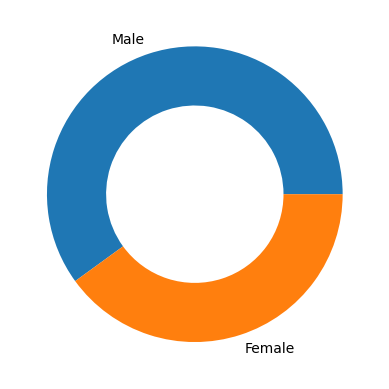

In [38]:
plt.pie(gen, labels=gen.index, wedgeprops={'width':0.4});

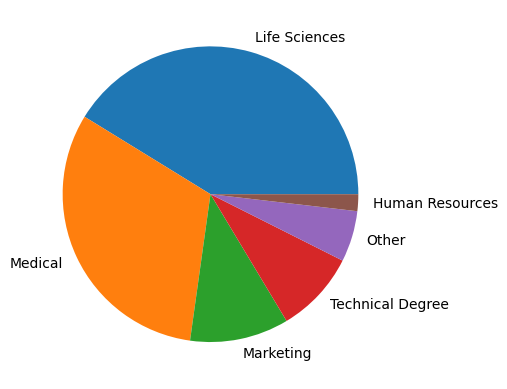

In [39]:
plt.pie(edu, labels=edu.index);

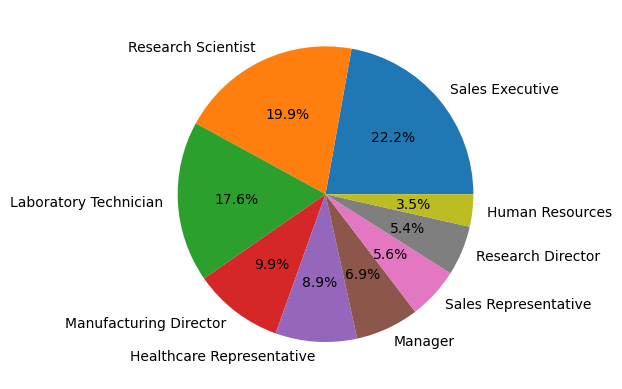

In [40]:
plt.pie(job, labels=job.index, autopct='%1.1f%%');

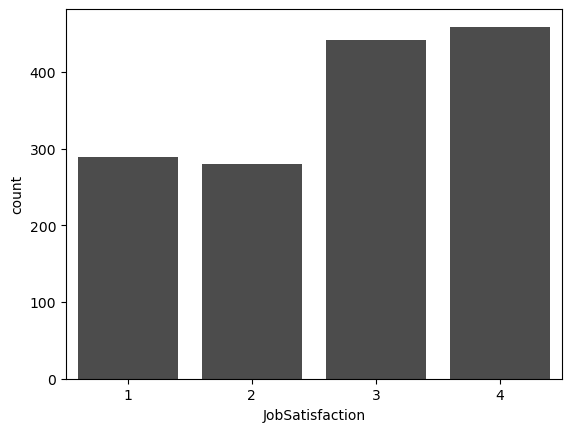

In [42]:
sb.countplot(data=df, x='JobSatisfaction', color='black', alpha=0.7);

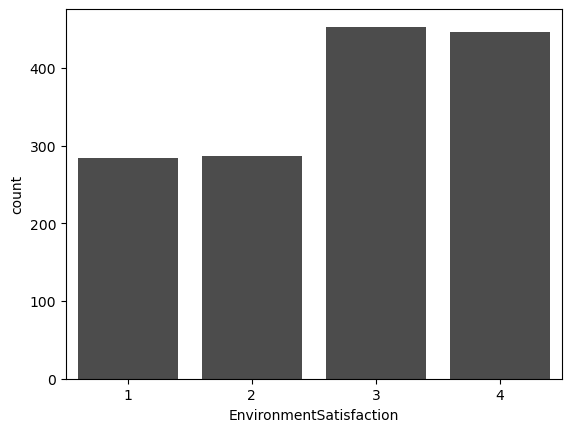

In [43]:
sb.countplot(data=df, x='EnvironmentSatisfaction', color='black', alpha=0.7);

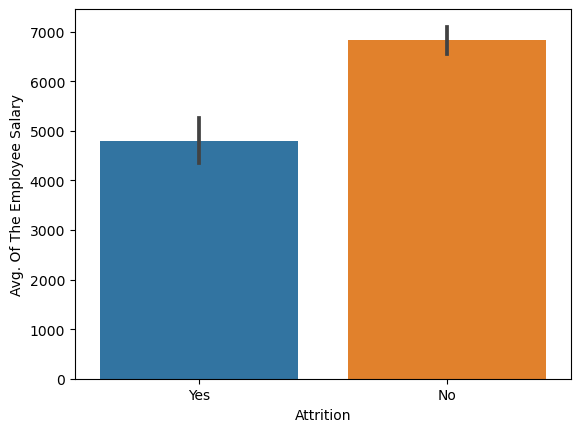

In [44]:
sb.barplot(data=df, x='Attrition', y='MonthlyIncome')
plt.ylabel('Avg. Of The Employee Salary');

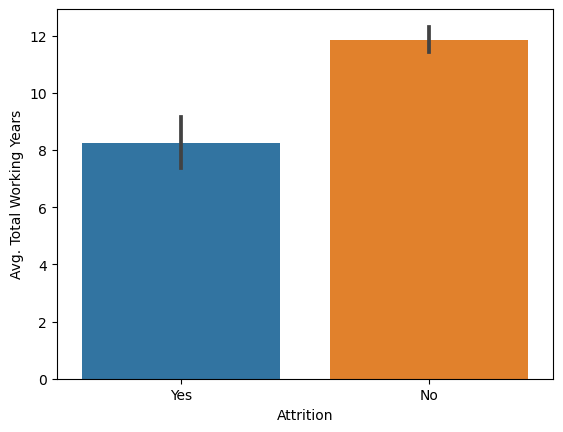

In [45]:
sb.barplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.ylabel('Avg. Total Working Years');

<a id='conclusions'></a>
# Conclusions

#### The main problem with employee departures is salary, as employees who leave the company receive lower salaries, and newly graduated employees often leave faster. Job satisfaction and work environment satisfaction are not a common reason for employee departure.
#### I think the solution is to raise the salaries of newly graduated employees, and collect additional data on the average salary of fresh graduates in the market to further understand why.